In [1]:
#Este notebook carga el dataset MNIST, imprime algunos ejemplos, y despues extrae sólo dos clases indicadas (ejemplo: 0, 1)
#para realizar clasificación binaria.
#Tareas:
#- Diseña un MLP y entrenalo para realizar clasificación binaria.
#- Juega con distintas arquitrecturas para ver con cuál obtienes menor pérdida.
#  desde un perceptron sigmoide, hasta una red de 4 o 5 capas intermedias (con diferentes cantidades de unidades).
#- Evalua el desempeño con diferentes learning rates, tamaño de batches, y número de épocas.
#- Elige otras dos clases y repite el proceso (ejemplo, clases 3 vs 8, o 4 vs 9)

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.regularizers import l2, l1

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print("Training set:")
print(x_train.shape)
print(y_train.shape)
print("Test set:")
print(x_test.shape)
print(y_test.shape)

Training set:
(60000, 784)
(60000, 10)
Test set:
(10000, 784)
(10000, 10)


In [3]:
# Split train into train and validation
validation_rate = 0.2
n_train_samples = round(validation_rate * len(x_train))
print("Taking {} validation samples".format(n_train_samples))
x_val = x_train[:n_train_samples]
y_val = y_train[:n_train_samples]
x_train = x_train[n_train_samples:]
y_train = y_train[n_train_samples:]
print("Training set:")
print(x_train.shape)
print(y_train.shape)
print("Validation set:")
print(x_val.shape)
print(y_val.shape)

Taking 12000 validation samples
Training set:
(48000, 784)
(48000, 10)
Validation set:
(12000, 784)
(12000, 10)


In [16]:
# Build your model architecture (layers with activations), and print summary
model = Sequential()
model.add(Dense(units=, input_dim=x_train.shape[1], activation=''))
model.add(Dense(units=, activation=''))
model.add(Dense(units=, activation=''))
model.summary()

In [13]:
# Compile your model (define optimizer and loss function)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [14]:
# Train your model
num_epochs = 
losses = np.zeros((num_epochs, 2))
print(f"Training on {x_train.shape[0]} samples - validating on {x_val.shape[0]} samples.")
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1:3d} -- ", end="")
    model.fit(x_train, y_train, epochs=1, batch_size=128, validation_data=(x_val, y_val), verbose=False)
    losses[epoch, 0] = model.evaluate(x_train, y_train, verbose=False)
    losses[epoch, 1] = model.evaluate(x_val, y_val, verbose=False)
    print(f"Train loss: {losses[epoch, 0]:6.4f} -- Val loss{losses[epoch, 1]:6.4f}")

Training on 48000 samples - validating on 12000 samples.
Epoch:   1 -- Train loss: 0.0741 -- Val loss0.1052
Epoch:   2 -- Train loss: 0.0442 -- Val loss0.0905
Epoch:   3 -- Train loss: 0.0347 -- Val loss0.0945
Epoch:   4 -- Train loss: 0.0276 -- Val loss0.0923
Epoch:   5 -- Train loss: 0.0129 -- Val loss0.0825
Epoch:   6 -- Train loss: 0.0090 -- Val loss0.0764
Epoch:   7 -- Train loss: 0.0126 -- Val loss0.0882
Epoch:   8 -- Train loss: 0.0083 -- Val loss0.0902
Epoch:   9 -- Train loss: 0.0074 -- Val loss0.0956
Epoch:  10 -- Train loss: 0.0067 -- Val loss0.0919
Epoch:  11 -- Train loss: 0.0047 -- Val loss0.0870
Epoch:  12 -- Train loss: 0.0039 -- Val loss0.0887
Epoch:  13 -- Train loss: 0.0034 -- Val loss0.0948
Epoch:  14 -- Train loss: 0.0039 -- Val loss0.0913
Epoch:  15 -- Train loss: 0.0029 -- Val loss0.0996
Epoch:  16 -- Train loss: 0.0041 -- Val loss0.0976
Epoch:  17 -- Train loss: 0.0032 -- Val loss0.1106
Epoch:  18 -- Train loss: 0.0021 -- Val loss0.1049
Epoch:  19 -- Train loss:

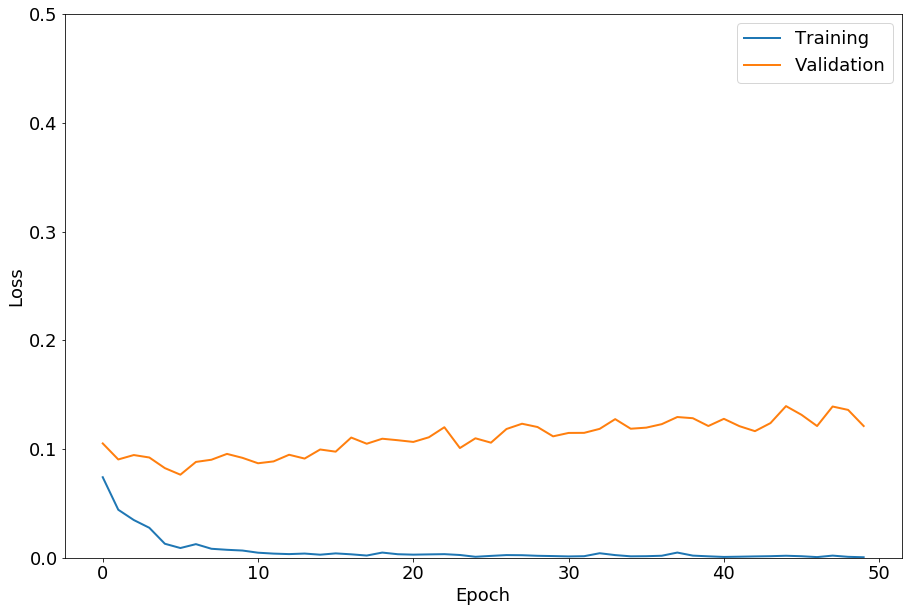

In [15]:
# Plot training history
plt.figure(figsize=(15, 10))
plt.plot(losses[:, 0], label='Training', linewidth=2)
plt.plot(losses[:, 1], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.ylim([0, 0.5])
plt.tick_params(labelsize=18)

In [17]:
# Make predictions for test set and evaluate performance
y_hat = model.predict(x_test)
test_loss = model.evaluate(x_test, y_test)
print("Test error: {:6.4f}".format(test_loss))

10000/10000 [==============================] - 0s 39us/step
Test error: 0.1580
